In [6]:
import os
import pandas as pd
import numpy as np

## FRAGEN

* Macht es sinn Aussreisser für jede Perspektive einzeln zu identifiezieren und zu entfernen?
    --> Folge: unterschiedlich viele Werte für das Selbe Video

* 14 Millionen Datensätze zu viel?
    --> Videos kürzen ? Dadurch weniger Datensätze

* FÜr unterschiddliche Winkel die wir berechnen wollen biete sich eine Perspektive eher an als die andere
    --> Deshalb Daten aus den beiden perspektiven getrennt betrachent?

## TODOS

* OpenCV Landmarks analysieren unn verstehen (MARIUS)
* Aussreisser erkennung über dataframes laufen lassen (ROBIN)
* Welche Glenkpunkte sind wichtiger als andere? (PERRY)

# Task-2c: Evalutation 

> Test the quality from the extracted data - plausibility checks shall be performed checking
* The absolute values for each keypoint (outliers ?)
* The values for each keypoint over time (anomalies?)
* The values for each keypoint relative to other keypoints (anomalies ?)

> Für das endgültige Ziel, einen passenden Laufschuh für jede Laufart zu finden, müssen die Daten wie folgt aufbereitet werden:

* Für jedes Video Außreisser finden und beseitigen
* Folge: Jeder Dataframe je Video hat unterschidlich viele Werte, da die Außreisser unterschiedlich sein werden
* Jede Laufgeschwindigkeit hat 2 Videos (Perspektiven) und somit je zwei Werte zu denseleben Keypoints. Diese müssen zu einem gemeinsamen Wert verrechnet werden.

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [7]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    df = pd.read_csv(file)
    df_dict_all[pre] = df
    if len(df) < 1798:
        print(pre)

print(f'{len(df_dict_all)} DataFrames')
print(f'{len(df.columns.tolist())} features per Dataframe')
print(f'{len(df)} rows per Dataframe')

59 DataFrames
132 features per Dataframe
1799 rows per Dataframe


In [8]:
print(df_dict_all.keys())
# df = df_dict_all[list(df_dict_all.keys())[2]]
# df2 = df_dict_all[list(df_dict_all.keys())[3]]
df = df_dict_all["Gehen-7_geschnitten"]
df2 = df_dict_all["Gehen-7_hinten_geschnitten"]
df3 = df_dict_all["Joggen-7_geschnitten"]
df4 = df_dict_all["Joggen-7_hinten_geschnitten"]
df5 = df_dict_all["Laufen-7_geschnitten"]
df6 = df_dict_all["Laufen-7_hinten_geschnitten"]

dict_keys(['Gehen-10_geschnitten', 'Gehen-10_hinten_geschnitten', 'Gehen-1_geschnitten', 'Gehen-1_hinten_geschnitten', 'Gehen-2_hinten_geschnitten', 'Gehen-3_geschnitten', 'Gehen-3_hinten_geschnitten', 'Gehen-4_geschnitten', 'Gehen-4_hinten_geschnitten', 'Gehen-5_geschnitten', 'Gehen-5_hinten_geschnitten', 'Gehen-6_geschnitten', 'Gehen-6_hinten_geschnitten', 'Gehen-7_geschnitten', 'Gehen-7_hinten_geschnitten', 'Gehen-8_geschnitten', 'Gehen-8_hinten_geschnitten', 'Gehen-9_geschnitten', 'Gehen-9_hinten_geschnitten', 'Joggen-10_geschnitten', 'Joggen-10_hinten_geschnitten', 'Joggen-1_geschnitten', 'Joggen-1_hinten_geschnitten', 'Joggen-2_geschnitten', 'Joggen-2_hinten_geschnitten', 'Joggen-3_geschnitten', 'Joggen-3_hinten_geschnitten', 'Joggen-4_geschnitten', 'Joggen-4_hinten_geschnitten', 'Joggen-5_geschnitten', 'Joggen-5_hinten_geschnitten', 'Joggen-6_geschnitten', 'Joggen-6_hinten_geschnitten', 'Joggen-7_geschnitten', 'Joggen-7_hinten_geschnitten', 'Joggen-8_geschnitten', 'Joggen-8_hint

### Which Data are relevant?
Not all landmarks are required for our UseCase. Previous research has shown that all points above the hip are irrelevant. These are removed from the data record for subsequent processing.

* Relevant landmarks: >=23
* Irrlevenate Landmarks: <23

Für die 10 relevanten Keypoints gibt es in jedem Dataframe 4 Spalten mit Werten:
* x -->  Bildbreite (Werte normalisiert auf [0,0, 1,0])
* y -->  Bildhöhe (Werte normalisiert auf [0,0, 1,0])
* z -->  Bildtiefe (Werte normalisiert auf [0,0, 1,0])
* v -->  Sichtbarkeit (Werte normalisiert auf [0,0, 1,0]) 

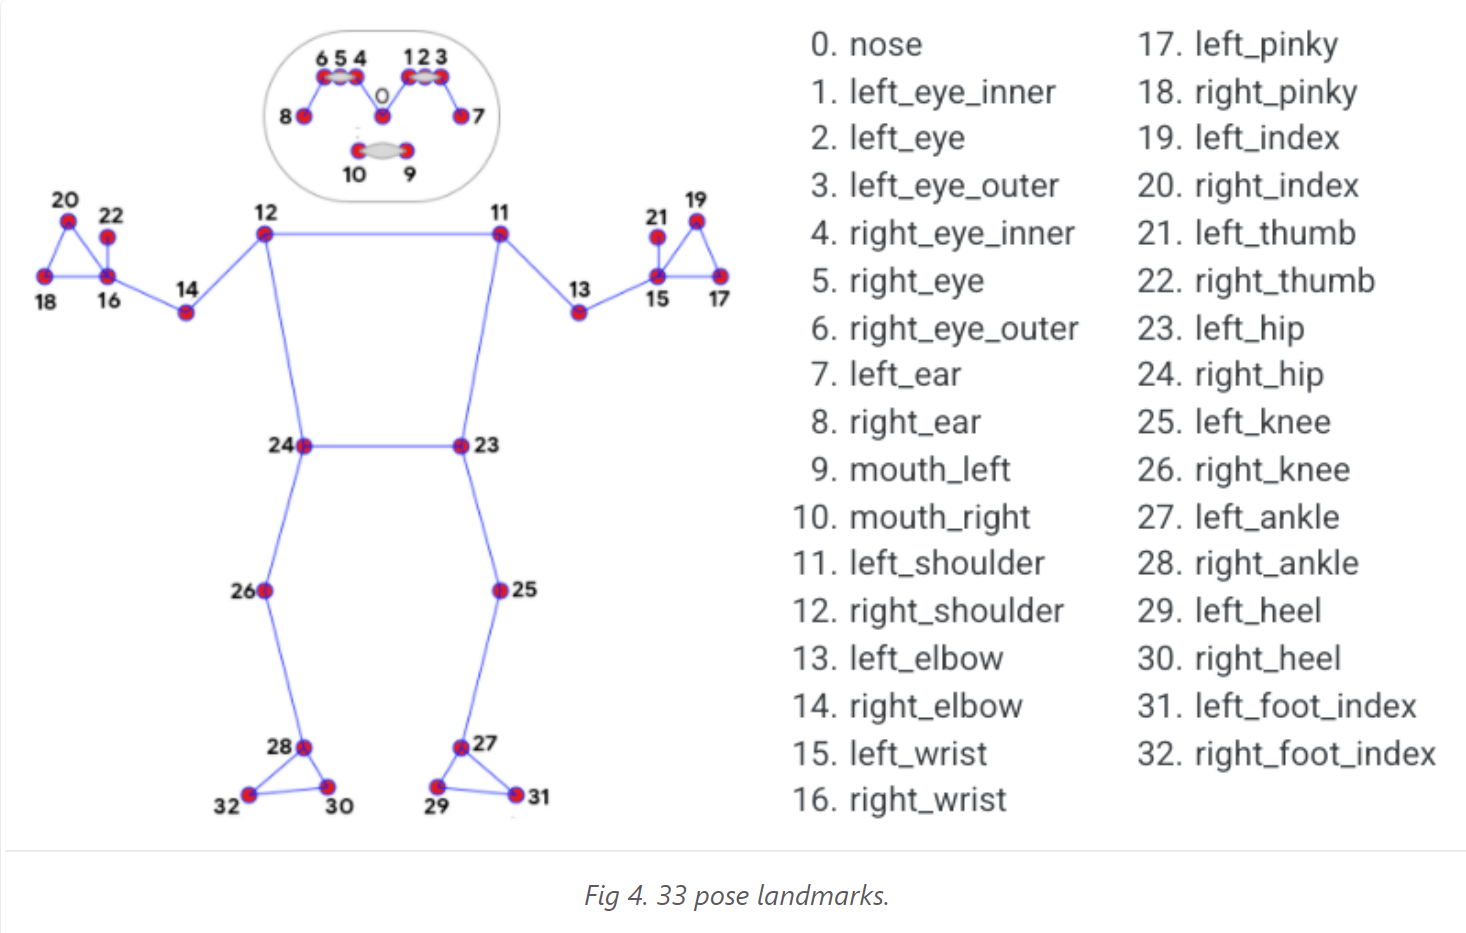

In [9]:
from IPython.display import display, Image
display(Image(filename='landmarks.png'))

In [10]:
#
landmarks_all = df.columns.tolist()
landmarks_relevant = landmarks_all[-40:]

df_side_gehen =  df[landmarks_relevant]
df_back_gehen = df2[landmarks_relevant]

df_side_joggen =  df3[landmarks_relevant]
df_back_joggen = df4[landmarks_relevant]

df_side_laufen =  df5[landmarks_relevant]
df_back_laufen = df6[landmarks_relevant]

In [15]:
import pandas as pd
import plotly.express as px

df_side = df_side_gehen
df_back = df_back_gehen

fig_side = px.line(df_side, y="x27", title='Position LEFT_Achillisene')
fig_back = px.line(df_back, y="z27")
fig_back.update_traces(line= dict(
    color = "green"
))

fig_side.add_trace(fig_back.data[0], )
fig_side.show()
#df

In [14]:
#Geschwindigkeit: GEHEN
#Perspektive: SEITE
print(df_side_gehen.head())

        x24       y24       z24       v24       x25       y25       z25  \
0  0.385162  0.487723 -0.203549  0.999609  0.404919  0.493402  0.203717   
1  0.383291  0.495201 -0.202746  0.999605  0.403328  0.499441  0.202926   
2  0.381833  0.501920 -0.207680  0.999610  0.400289  0.506061  0.207948   
3  0.382032  0.509172 -0.218420  0.999623  0.392021  0.512258  0.218719   
4  0.379849  0.509617 -0.226084  0.999641  0.389189  0.511992  0.226409   

        v25       x26       y26  ...       z31       v31       x32       y32  \
0  0.999102  0.250545  0.614322  ...  0.243958  0.848426  0.152448  0.793500   
1  0.999094  0.264702  0.615783  ...  0.280306  0.854338  0.123446  0.783071   
2  0.999100  0.275714  0.627779  ...  0.493095  0.860638  0.083279  0.769804   
3  0.999120  0.283578  0.634219  ...  0.464914  0.870108  0.076619  0.764255   
4  0.999135  0.284757  0.631708  ...  0.453606  0.877291  0.076049  0.767053   

        z32       v32       x33       y33       z33       v33  
0 -0